In [1]:
import requests
from PIL import Image
from io import BytesIO

In [2]:
url = "https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/" \
      "VIIRS_SNPP_CorrectedReflectance_TrueColor/default/" \
      "2026-01-12/250m/2/1/1.png"

In [4]:
import requests

response = requests.get(url)
print("Status code:", response.status_code)
print("Content-Type:", response.headers.get("Content-Type"))
print(response.text[:300])  # preview response


Status code: 400
Content-Type: text/xml
<?xml version="1.0" encoding="UTF-8"?>
<ExceptionReport xmlns="http://www.opengis.net/ows/1.1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://schemas.opengis.net/ows/1.1.0/owsExceptionReport.xsd" version="1.1.0" xml:lang="en">
<Exception exceptionCode="InvalidParame


In [6]:
import requests

headers = {"User-Agent": "Mozilla/5.0"}

url = (
    "https://gibs.earthdata.nasa.gov/wmts/epsg3857/best/"
    "VIIRS_SNPP_CorrectedReflectance_TrueColor/default/"
    "2024-01-12/GoogleMapsCompatible_Level2/1/1/1.jpg"
)

response = requests.get(url, headers=headers)

print("Status Code:", response.status_code)
print("Content-Type:", response.headers.get("Content-Type"))
print("First 300 chars of response:\n")
print(response.text[:300])


Status Code: 400
Content-Type: text/xml
First 300 chars of response:

<?xml version="1.0" encoding="UTF-8"?>
<ExceptionReport xmlns="http://www.opengis.net/ows/1.1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://schemas.opengis.net/ows/1.1.0/owsExceptionReport.xsd" version="1.1.0" xml:lang="en">
<Exception exceptionCode="InvalidParame


In [7]:
import requests
from PIL import Image
from io import BytesIO

headers = {"User-Agent": "Mozilla/5.0"}

url = (
    "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"
    "?SERVICE=WMS"
    "&REQUEST=GetMap"
    "&VERSION=1.3.0"
    "&LAYERS=VIIRS_SNPP_CorrectedReflectance_TrueColor"
    "&FORMAT=image/png"
    "&TRANSPARENT=false"
    "&WIDTH=512"
    "&HEIGHT=512"
    "&CRS=EPSG:4326"
    "&BBOX=-60,-30,0,30"
    "&TIME=2024-01-12"
)

response = requests.get(url, headers=headers)

print("Status:", response.status_code)
print("Type:", response.headers.get("Content-Type"))

img = Image.open(BytesIO(response.content))
img.show()
img.save("nasa_ocean.png")


Status: 200
Type: image/png


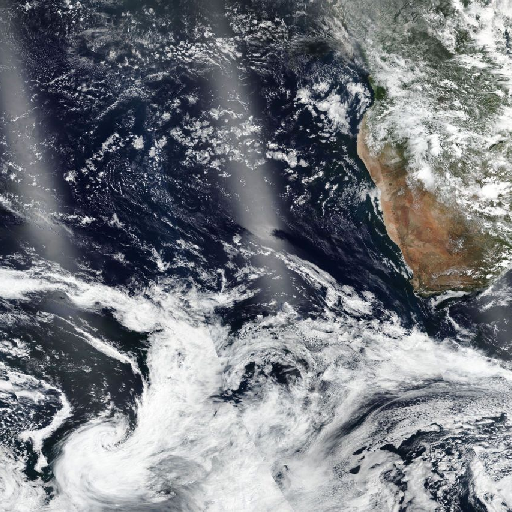

In [8]:
from IPython.display import display
from PIL import Image
from io import BytesIO
import requests

img = Image.open(BytesIO(response.content))
display(img)   # ✅ THIS shows the image
img.save("nasa_ocean.png")
